# Proyecto 3
* Nataly Alvarez Vanegas
* Oscar Eduardo Acero Acero

In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from skimage import io
from tqdm import tqdm
import os
%matplotlib inline

### Read Data

In [2]:
path = ''

In [3]:
dataTraining = pd.read_csv(os.path.join(path, 'data', 'dataTraining.csv'), encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv(os.path.join(path, 'data', 'dataTesting.csv'), encoding='UTF-8', index_col=0)

In [4]:
dataTraining.shape

(7895, 5)

In [5]:
dataTesting.shape

(3383, 3)

In [6]:
dataTraining.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6


In [7]:
dataTesting.head()

,year,title,plot
1,1999,Message in a Bottle,"who meets by fate , shall be sealed by fate ...."
4,1978,Midnight Express,"the true story of billy hayes , an american c..."
5,1996,Primal Fear,martin vail left the chicago da ' s office to ...
6,1950,Crisis,husband and wife americans dr . eugene and mr...
7,1959,The Tingler,the coroner and scientist dr . warren chapin ...


### Read Images

In [8]:
image = io.imread(os.path.join(path, 'images_resize_gray', str(dataTraining.index[0]) + '_resize_gray.jpeg'))

In [9]:
image

array([[ 3,  3,  3, ..., 57, 55, 51],
       [ 3,  3,  3, ..., 99, 98, 95],
       [ 3,  3,  3, ..., 97, 96, 94],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

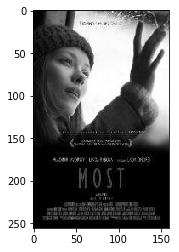

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.imshow(image, cmap='gray')

Read all images

In [11]:
images_training = []
for i in tqdm(dataTraining.index):
    images_training.append(io.imread(os.path.join(path, 'images_resize_gray', str(i) + '_resize_gray.jpeg')).flatten())


100%|██████████████████████████████████████████████████████████████████████████████| 7895/7895 [01:31<00:00, 86.01it/s]


In [12]:
images_training = np.stack(images_training)

images_training.shape, dataTraining.shape[0]

((7895, 40960), 7895)

In [13]:
images_training2=images_training

In [14]:
images_testing = []
for i in tqdm(dataTesting.index):
    images_testing.append(io.imread(os.path.join(path, 'images_resize_gray', str(i) + '_resize_gray.jpeg')).flatten())

images_testing = np.stack(images_testing)

images_testing.shape, dataTesting.shape[0]

100%|█████████████████████████████████████████████████████████████████████████████| 3383/3383 [00:11<00:00, 296.07it/s]


((3383, 40960), 3383)

In [15]:
images_testing2=images_testing

## Apply PCA

In [16]:
pca = PCA(n_components=32)
images_training_pca = pca.fit_transform(images_training2)

In [17]:
images_training2

array([[  3,   3,   3, ...,   0,   0,   0],
       [211, 213, 214, ..., 190, 190, 191],
       [204, 206, 209, ..., 229, 229, 230],
       ...,
       [125, 125, 125, ..., 251, 251, 251],
       [220, 232, 245, ..., 240, 240, 239],
       [ 11,  12,  13, ...,  29,  28,  28]], dtype=uint8)

In [18]:
images_testing_pca = pca.transform(images_testing2)

# Create y

In [19]:
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))
le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])

In [20]:
X_train, X_test, y_train_genres, y_test_genres = train_test_split(images_training_pca, y_genres, test_size=0.33, random_state=42)

# Train multi-class multi-label model

In [21]:
clf = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, n_estimators=100, max_depth=10, random_state=42))

In [22]:
clf.fit(X_train, y_train_genres)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          n_jobs=1)

In [23]:
y_pred_genres = clf.predict_proba(X_test)

In [24]:
roc_auc_score(y_test_genres, y_pred_genres, average='macro')

0.5838111864826265

In [25]:
cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

y_pred_test_genres = clf.predict_proba(images_testing_pca)

pd.DataFrame(y_pred_test_genres, index=dataTesting.index, columns=cols).to_csv('pred_genres_img_RF.csv', index_label='ID')

## Punto 1

### Apply models to test 
### Modelos Machine Learning
#### Modelo prediccion Imagenes

In [26]:
# import the necessary packages
import h5py
import numpy as np
import os
import glob
import cv2
import warnings
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.externals import joblib

# create all the machine learning models
models = []
models.append(('LR', OneVsRestClassifier(LogisticRegression(random_state=9))))
models.append(('LDA', OneVsRestClassifier(LinearDiscriminantAnalysis())))
models.append(('KNN', OneVsRestClassifier(KNeighborsClassifier())))
models.append(('CART', OneVsRestClassifier(DecisionTreeClassifier(random_state=9))))
models.append(('RF', OneVsRestClassifier(RandomForestClassifier(n_estimators=50, random_state=9))))
models.append(('NB', OneVsRestClassifier(GaussianNB())))
models.append(('SVM', OneVsRestClassifier(SVC(random_state=9,probability=True))))

In [27]:
# 10-fold cross validationX_train, y_train_genres
results = []
names = []
scoring = "accuracy"

for name, model in models:
    kfold = KFold(n_splits=5, random_state=7)
    cv_results = cross_val_score(model, X_train, y_train_genres, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.043108 (0.005750)
LDA: 0.043108 (0.006025)
KNN: 0.040460 (0.004824)
CART: 0.011721 (0.003615)
RF: 0.039137 (0.002958)
NB: 0.041406 (0.005924)
SVM: 0.044245 (0.021678)


In [28]:
results

[array([0.03497164, 0.05293006, 0.04347826, 0.04253308, 0.04162725]),
 array([0.03308129, 0.05198488, 0.04347826, 0.04442344, 0.04257332]),
 array([0.04064272, 0.04725898, 0.0415879 , 0.04064272, 0.03216651]),
 array([0.01134216, 0.01228733, 0.01701323, 0.01228733, 0.00567644]),
 array([0.03591682, 0.04253308, 0.04253308, 0.03875236, 0.0359508 ]),
 array([0.04536862, 0.03875236, 0.03591682, 0.0510397 , 0.0359508 ]),
 array([0.0557656 , 0.05293006, 0.0557656 , 0.00094518, 0.05581835])]

In [29]:
names

['LR', 'LDA', 'KNN', 'CART', 'RF', 'NB', 'SVM']

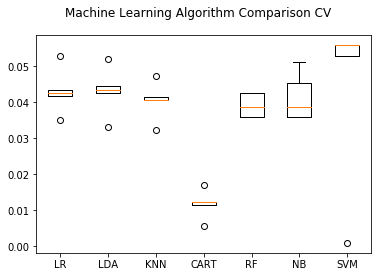

In [30]:
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Machine Learning Algorithm Comparison CV')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [31]:
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [32]:
results = []
names = []
scoring = "accuracy"
for name, model in models:
    model2=model.fit(X_train, y_train_genres)
    y_pred_genres = model2.predict_proba(X_test)
    roc=roc_auc_score(y_test_genres, y_pred_genres, average='macro')
    results.append(roc)
    MSE= metrics.mean_squared_error(y_test_genres, y_pred_genres)
    names.append(name)
    msg = "%s: %f (%f)" % (name,roc,MSE)
    print(msg)

LR: 0.613577 (0.083715)
LDA: 0.615145 (0.083736)
KNN: 0.543118 (0.098924)
CART: 0.517523 (0.175189)
RF: 0.563509 (0.086795)
NB: 0.613392 (0.089324)
SVM: 0.500662 (0.086805)


In [33]:
resultados=np.asarray(results)
resultados

array([0.61357697, 0.6151449 , 0.54311808, 0.51752273, 0.56350901,
       0.61339244, 0.50066239])

In [34]:
nombres=['LR','LDA','KNN','CART','RF','NB','SVM']
nombres

['LR', 'LDA', 'KNN', 'CART', 'RF', 'NB', 'SVM']

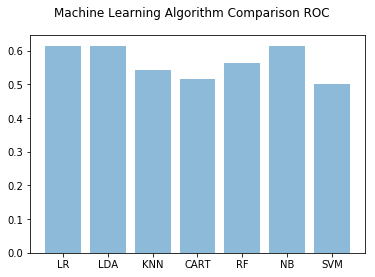

In [35]:
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Machine Learning Algorithm Comparison ROC')
ax = fig.add_subplot(111)
plt.bar(nombres, resultados, align='center', alpha=0.5)
ax.set_xticklabels(nombres)
pyplot.show()

#### Modelo 2 LDA

In [36]:
lda = OneVsRestClassifier(LinearDiscriminantAnalysis())
lda.fit(X_train, y_train_genres)

OneVsRestClassifier(estimator=LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001),
          n_jobs=1)

In [37]:
y_pred_genres2 = lda.predict_proba(X_test)

In [38]:
# calculate AUC
from sklearn import metrics
print(metrics.roc_auc_score(y_test_genres, y_pred_genres2, average='macro'))

0.615144896581285


In [39]:
cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

y_pred_test_genres = lda.predict_proba(images_testing_pca)

pd.DataFrame(y_pred_test_genres, index=dataTesting.index, columns=cols).to_csv('pred_genres_img_RF3.csv', index_label='ID')

In [40]:
# Modelo3 NBB

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
from sklearn.tree import DecisionTreeClassifier
KNE= OneVsRestClassifier(DecisionTreeClassifier(random_state=15))
KNE.fit(X_train, y_train_genres)

OneVsRestClassifier(estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=15,
            splitter='best'),
          n_jobs=1)

In [43]:
y_pred_genres3 = KNE.predict_proba(X_test)

In [44]:
# calculate AUC
from sklearn import metrics
print(metrics.roc_auc_score(y_test_genres, y_pred_genres3, average='macro'))

0.5164587517537521


Segun lo anterior el mejor acuraccy arrojado por lo medelos coresponde al LDA

## PUNTO 2

# Create a solution using both images and text with a Deep Learning algorithm (CNN, transfer learning, RNN)

#### Se cargan los índices de los datos de entrenamiento

In [45]:
dataTraining2 = pd.read_csv(os.path.join(path, 'data', 'dataTraining.csv'), encoding='UTF-8', index_col=0)
#dataTesting2 = pd.read_csv(os.path.join(path, 'data', 'dataTesting.csv'), encoding='UTF-8', index_col=0)

In [46]:
dataTraining2.sample()

,year,title,plot,genres,rating
5074,2000,The Broken Hearts Club: A Romantic Comedy,a group of gay friends in west hollywood lean ...,"['Comedy', 'Drama', 'Romance', 'Sport']",7.0


### Modelo para imágenes

#### Se cargan las imágenes a color (algunas se encuentran en escala grises entonces se les agrega la tercera dimension) aplicando un resize para unificar el tamaño.  

In [47]:
import cv2
from tqdm import tqdm
from PIL import Image


Image.MAX_IMAGE_PIXELS = None

num_images_train = 7895

images_train_index = dataTraining2.index[:num_images_train]
dim_3 = [np.newaxis, np.newaxis, np.newaxis]
images_training = []
for i in tqdm(images_train_index):
    image = io.imread(os.path.join(path, 'images', str(i) + '.jpeg'))
    image = cv2.resize(image,(224,224))
    if len(image.shape) == 2:
        image = np.repeat(image[:, :, np.newaxis], 3, axis=2)
    images_training.append(image)

100%|██████████████████████████████████████████████████████████████████████████████| 7895/7895 [06:21<00:00, 20.72it/s]


In [202]:
#images_training = np.stack(images_training)

In [49]:
imag_train=np.array(images_training)
imag_train = imag_train.astype("float32")
imag_train /= 255

In [50]:
imag_train.shape

(7895, 224, 224, 3)

#### Definimos Y

In [51]:
data_train_genres = dataTraining2[:num_images_train]
data_train_genres['genres'] = data_train_genres['genres'].map(lambda x: eval(x))
le = MultiLabelBinarizer()
y_genres = le.fit_transform(data_train_genres['genres'])

In [52]:
len(y_genres)

7895

In [53]:
y_genres_arr = np.array(y_genres)

#### Dividimos los datos para entrenar y validar el modelo

In [54]:
X_train, X_test, y_train_genres, y_test_genres = train_test_split(imag_train, y_genres_arr, test_size=0.33, random_state=42)

In [55]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from livelossplot import PlotLossesKeras
from keras.layers.convolutional import Conv1D
from keras import optimizers
from keras.layers.normalization import BatchNormalization  
from keras import backend as K
from keras.applications.vgg16 import VGG16

Using TensorFlow backend.


### Definición del modelo con imágenes
#### Se realiza el proceso Transfer Learning partiendo desde la penúltima capa del modelo pre entrenado VGG16. 

In [56]:
model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers except the last 4 layers
#for layer in model_vgg16.layers[:-8]:
#    layer.trainable = False
    
model_vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

#### Se pasan las X por el modelo VGG cargado

In [57]:
X_train2 = model_vgg16.predict(X_train)
X_train2.shape

(5289, 7, 7, 512)

In [58]:
X_test2 = model_vgg16.predict(X_test)
X_test2.shape

(2606, 7, 7, 512)

In [59]:
K.image_data_format()

'channels_last'

In [60]:
ChanDim=-1

#### Después de varios experimentos donde a partir del VGG16 se intentaron diferentes variantes de Transfer Learning, como re entrenar diferente número de bloques de convolución y de probar adicionando nuevas capas de convolución y capas ocultas, la siguiente arquitectura de red neuronal es la que mejor resultados nos permitió obtener:

In [92]:
model = Sequential()


model.add(Conv2D(32, (3,3),padding='same',input_shape=X_train2.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=ChanDim))
model.add(Conv2D(32, (3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=ChanDim))
model.add(MaxPooling2D (2,2))
model.add(Dropout(0.3))


model.add(Conv2D(64, (3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=ChanDim))
model.add(Conv2D(64, (3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=ChanDim))
model.add(MaxPooling2D (2,2))
model.add(Dropout(0.3))


model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(Dense(units=y_train_genres.shape[1]))
model.add(Activation('sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 7, 7, 32)          147488    
_________________________________________________________________
activation_60 (Activation)   (None, 7, 7, 32)          0         
_________________________________________________________________
batch_normalization_53 (Batc (None, 7, 7, 32)          128       
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
activation_61 (Activation)   (None, 7, 7, 32)          0         
_________________________________________________________________
batch_normalization_54 (Batc (None, 7, 7, 32)          128       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 3, 3, 32)          0         
__________

#### El mejor entrenamiento se logró con el optimizador RMSprop y una tasa de aprendizaje de 0.0001. También se entró el modelo con SGD y Adam con diferenets tasas de aprendizaje, pero las curvas obtenidas de la función de perdida y precisión no fueron consistentes.

In [93]:
from keras.optimizers import RMSprop
model.compile(loss = 'binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.0001),
              metrics = ['accuracy'])

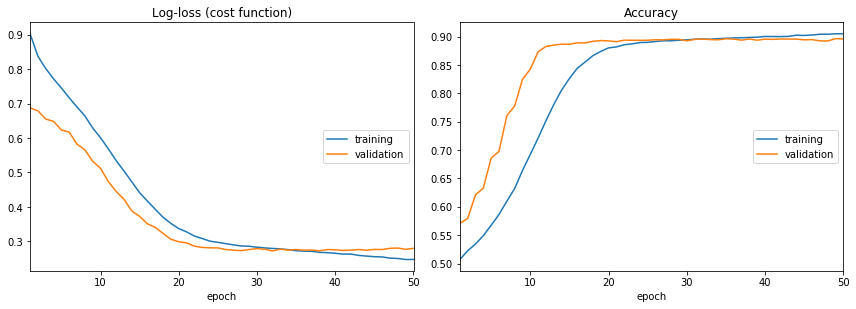

In [94]:
model.fit(X_train2, y_train_genres, validation_data=[X_test2, y_test_genres], 
          batch_size=128, epochs=50,
          callbacks=[PlotLossesKeras()])

In [97]:
image_predict=model.predict(X_test2, batch_size=8)

#### Área bajo la curva para de los resultados esperados vs la predicción del modelo con datos de prueba 

In [98]:
roc_auc_score(y_test_genres,image_predict, average='macro')

0.6937807521564547

#### Precisión al evaluar el modelo con los datos de prueba

In [101]:
score = model.evaluate(X_test2, y_test_genres)
score

2606/2606 [==============================] - ETA: 25 - ETA: 4 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s 310us/step


[0.27997173841239303, 0.8957374018609112]

### MODELO PARA TEXTO

In [117]:
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from livelossplot import PlotLossesKeras
%matplotlib inline

In [118]:
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
import keras
from keras import backend as K
print(K.tensorflow_backend._get_available_gpus())

['/job:localhost/replica:0/task:0/device:GPU:0']


#### Definimos una función para remover signos de puntuación, convetir a minúscula, remover stop words y lematizar el plot de cada película

In [102]:
import string
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re

def clean_text(text):
    
    ## Remove puncuation
    text = text.translate(string.punctuation)
    
    ## Convert words to lower case and split them
    text = text.lower().split()
    
    ## Remove stop words
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops and len(w) >= 3]
    
    text = " ".join(text)
    ## Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    ## Stemming
    text = text.split()
    stemmer = SnowballStemmer('english')
    stemmed_words = [stemmer.stem(word) for word in text]
    text = " ".join(stemmed_words)
    
    return text

In [103]:
path = ''

In [104]:
num_plots_train = num_images_train

#### Aplicamos pre procesamiento al texto

In [105]:
dataTraining2['plot'] = dataTraining2['plot'].map(lambda x: clean_text(x))

In [106]:
X_plot = dataTraining2['plot'][:num_plots_train]

In [107]:
#np.min([np.min(x) for x in X_plot2]), np.max([np.max(x) for x in X_plot2])

#### Se define el vocabulario a partir de todos los plot

In [108]:
voc=set(X_plot.str.split(' ',expand=True).stack().unique())
#voc=set(' '.join(X_plot))
vocabulary = {x: idx + 1 for idx, x in enumerate(set(voc))}

In [110]:
#print(vocabulary)

#### Se procede a representar cada plot como un vector de tamaño 500 y utilizando 5000 palabras del vocabulario

In [112]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

max_words = 5000
max_len = 500
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_plot)
sequences = tok.texts_to_sequences(X_plot)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
X_pad = sequences_matrix

#### Se dividen los datos para para realizar el entrenamiento y validación del modelo

In [113]:
X_train_plot, X_test_plot, y_train_plot, y_test_plot = train_test_split(X_pad, y_genres_arr, test_size=0.33, random_state=42)

### Definición del modelo

#### Se define la siguiente red LSTM. Además de Adam se probaron los optimizadores SGG y RSMprop, pero estos 2 provocaban un entrenamiento demasiado lento del modelo.

In [119]:
model3 = Sequential()
model3.add(Embedding(max_words, 128, input_length=max_len))
model3.add(LSTM(128, dropout=0.3,recurrent_dropout=0.3))
#model3.add(Dropout(0.3))
model3.add(Dense(24, activation='sigmoid'))
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model3.summary()   

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 128)          640000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_26 (Dense)             (None, 24)                3096      
Total params: 774,680
Trainable params: 774,680
Non-trainable params: 0
_________________________________________________________________


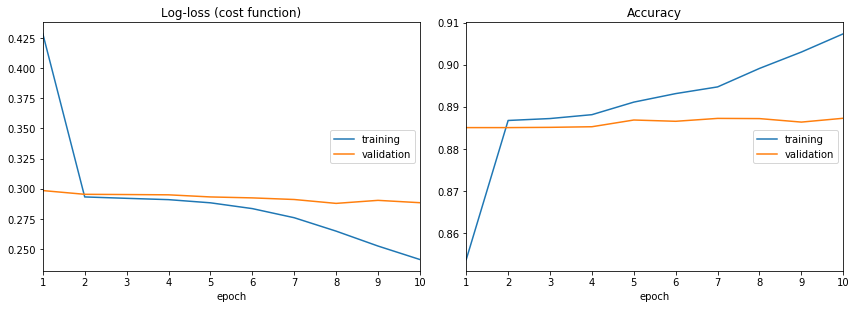

In [120]:
model3.fit(X_train_plot, y_train_plot, validation_data=[X_test_plot, y_test_plot], 
          batch_size=256, epochs=10,
          callbacks=[PlotLossesKeras()])

In [121]:
y_pred_plot = model3.predict(X_test_plot)

#### Área bajo la curva para de los resultados esperados vs la predicción del modelo con datos de prueba 

In [122]:
roc_auc_score(y_test_plot,y_pred_plot, average='macro')

0.6422832068051859

#### Precisión al evaluar el modelo con los datos de prueba

In [123]:
score_plot = model3.evaluate(X_test_plot, y_test_plot)
score_plot

2606/2606 [==============================] - ETA: 52 - ETA: 36 - ETA: 32 - ETA: 29 - ETA: 27 - ETA: 25 - ETA: 24 - ETA: 23 - ETA: 23 - ETA: 22 - ETA: 22 - ETA: 21 - ETA: 21 - ETA: 20 - ETA: 20 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 18 - ETA: 18 - ETA: 17 - ETA: 17 - ETA: 17 - ETA: 16 - ETA: 16 - ETA: 16 - ETA: 15 - ETA: 15 - ETA: 15 - ETA: 14 - ETA: 14 - ETA: 14 - ETA: 14 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 23s 9ms/step


[0.2884257455011194, 0.8872633691210977]

### Combinación de los modelos sobre los datos de la competencia


#### Se cargan los indices de los datos de la competencia

In [124]:
dataTesting = pd.read_csv(os.path.join(path, 'data', 'dataTesting.csv'), encoding='UTF-8', index_col=0)

#### Se cargan los plot de la competencia

In [125]:
plot_test = dataTesting['plot']

#### Se cargan las imágenes de la competencia

In [126]:
import cv2
from tqdm import tqdm
from PIL import Image


Image.MAX_IMAGE_PIXELS = None


images_test_index = dataTesting.index
dim_3 = [np.newaxis, np.newaxis, np.newaxis]
images_testing = []
for i in tqdm(images_test_index):
    image = io.imread(os.path.join(path, 'images', str(i) + '.jpeg'))
    image = cv2.resize(image,(224,224))
    if len(image.shape) == 2:
        image = np.repeat(image[:, :, np.newaxis], 3, axis=2)
    images_testing.append(image)

100%|██████████████████████████████████████████████████████████████████████████████| 3383/3383 [02:46<00:00, 20.35it/s]


In [127]:
imag_test = np.array(images_testing)
imag_test = imag_test.astype("float32")
imag_test /= 255

#### Se hace el procesamieto inicial sobre las imágenes para que puedan ser utilizadas por el modelo generado a través de Tranfer Learning

In [128]:
imag_test = model_vgg16.predict(imag_test)
imag_test.shape

(3383, 7, 7, 512)

#### Se realiza la predicción de generos de películas a partir de las imágenes

In [129]:
image_test_predict = model.predict(imag_test)

In [130]:
#for i in image_test_predict:
#    print(i)

#### Se aplica tratamiento sobre el texto de los plot

In [131]:
dataTesting['plot'] = dataTesting['plot'].map(lambda x: clean_text(x))

In [132]:
X_plot_test = dataTesting['plot']

In [133]:
X_plot_test[:3]

1    meet fate shall seal fate theresa osborn run a...
4    true stori billi hay american colleg student c...
5    martin vail left chicago offic becom success c...
Name: plot, dtype: object

In [135]:
test_sequences = tok.texts_to_sequences(X_plot_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)
x_pad_test = test_sequences_matrix

#### Se realiza la predicción de generos de películas a partir del texto de los plot

In [136]:
plot_test_predict = model3.predict(x_pad_test)

In [137]:
plot_test_predict.shape

(3383, 24)

In [138]:
image_test_predict.shape

(3383, 24)

#### Ejemplo de la predicción con imágenes

In [139]:
image_test_predict[1]

array([0.02407136, 0.02644817, 0.00606211, 0.07839664, 0.12126546,
       0.12515488, 0.14585072, 0.7317654 , 0.00989398, 0.0283312 ,
       0.02113722, 0.06303819, 0.13674642, 0.04806107, 0.01994301,
       0.12959337, 0.000949  , 0.21338405, 0.02305899, 0.01213249,
       0.01265541, 0.22330412, 0.04558109, 0.02487527], dtype=float32)

#### Ejemplo de la predicción con el texto de los plot

In [140]:
plot_test_predict[1]

array([0.16822411, 0.08043443, 0.01256465, 0.04026305, 0.19279566,
       0.41270334, 0.03112485, 0.7556571 , 0.02626323, 0.02077785,
       0.03215031, 0.04686245, 0.07518733, 0.01607642, 0.01471258,
       0.10473509, 0.0029101 , 0.09215287, 0.06703582, 0.01053477,
       0.02270679, 0.30749986, 0.05134458, 0.03988046], dtype=float32)

#### Entre los predicciones obtenidas de los modelos, se promedia la probabilidad de pertecer a cada categoría para cada predicción. 

In [142]:
result= np.zeros((3383, 24))
test_len = len(image_test_predict)
genre_len = 24

# iterate through rows
for i in range(0,test_len):   
# iterate through columns
    for j in range(0,genre_len):
        result[i][j] = (image_test_predict[i][j] + plot_test_predict[i][j])/2.0
        
#for r in result:
#    print(r)

#### Se almacena el resultado que será subido en la competencia.

In [143]:
cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

pd.DataFrame(result, index=dataTesting.index, columns=cols).to_csv('predicted_genres.csv', index_label='ID')